In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
%matplotlib inline

In [2]:
#getting stock data#
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2017,1,1)
import yfinance as yf

In [3]:
#tesla
Tesla=yf.download('TSLA',start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [5]:
#ford
Ford=yf.download('F',start,end)
Ford.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,6.232304,45709900
2012-01-04,11.15,11.53,11.07,11.30,6.327498,79725200
2012-01-05,11.33,11.63,11.24,11.59,6.489885,67877500
2012-01-06,11.74,11.80,11.52,11.71,6.557079,59840700
2012-01-09,11.83,11.95,11.70,11.80,6.607475,53981500


In [6]:
#GM
Gmt=yf.download('GM',start,end)
Gmt.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,15.935246,9321300
2012-01-04,21.049999,21.370001,20.750000,21.150000,16.010950,7856700
2012-01-05,21.100000,22.290001,20.959999,22.170000,16.783110,17880600
2012-01-06,22.260000,23.030001,22.240000,22.920000,17.350870,18234500
2012-01-09,23.200001,23.430000,22.700001,22.840000,17.290312,12084500


In [7]:
#visualize the data

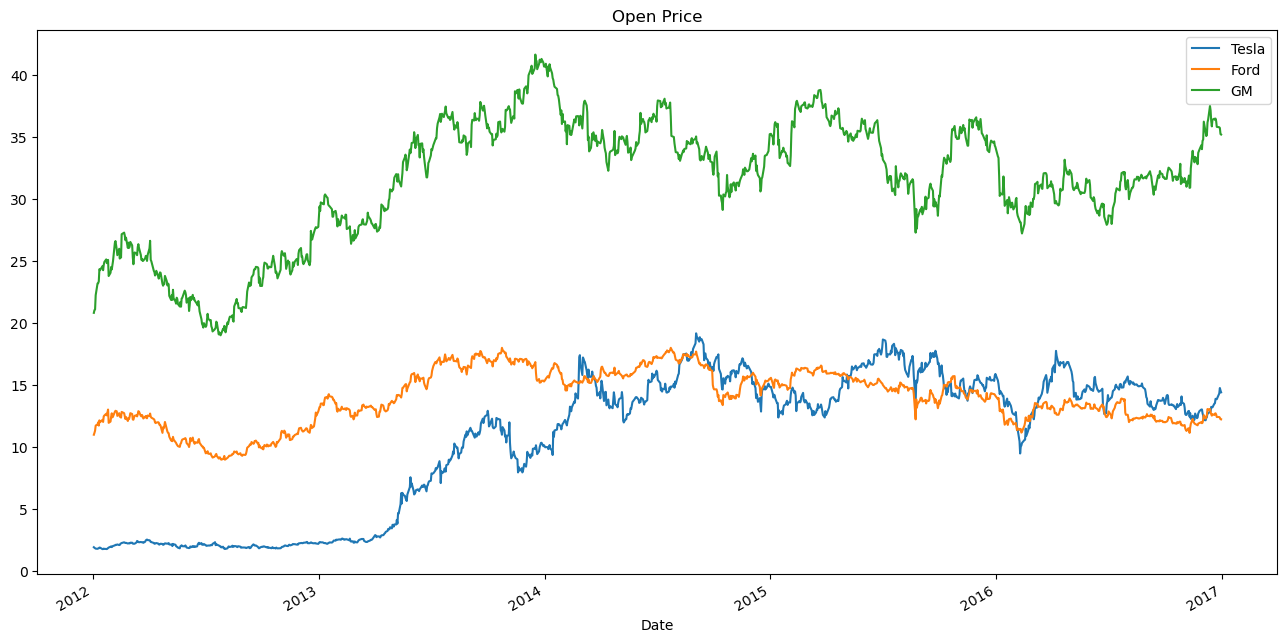

In [8]:
# Code Here
Tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
Ford['Open'].plot(label='Ford')
Gmt['Open'].plot(label='GM')
plt.legend()


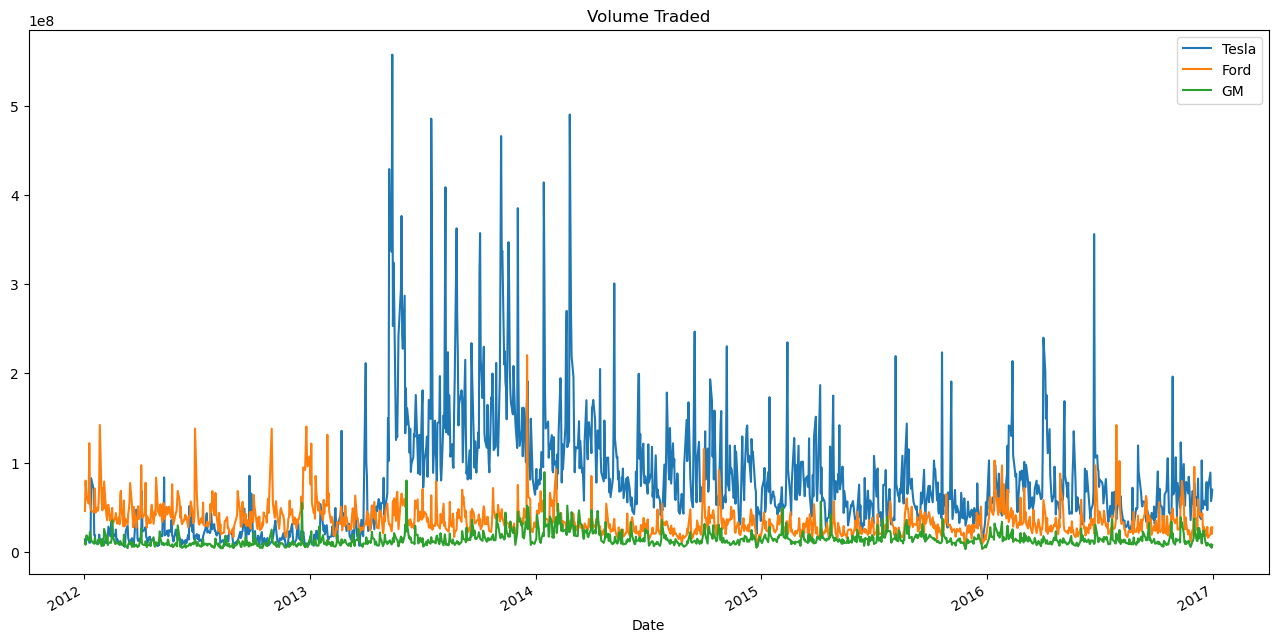

In [9]:
#Plot Volume of stock traded each day#
Tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
Ford['Volume'].plot(label='Ford')
Gmt['Volume'].plot(label='GM')
plt.legend()

In [10]:
#to see what happened at volume spike for Ford:#
Ford.index[Ford['Volume'].argmax()]

Timestamp('2013-12-18 00:00:00')

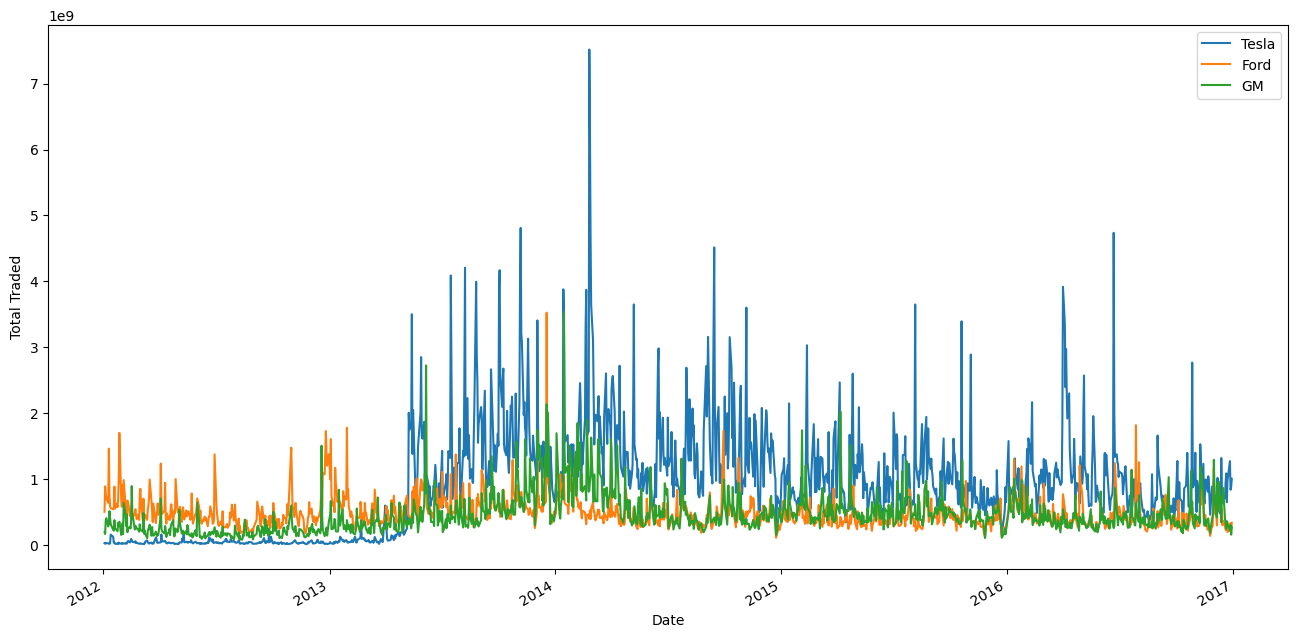

In [11]:
#total traded
Tesla['Total Traded']=Tesla['Open']*Tesla['Volume']
Ford['Total Traded']=Ford['Open']*Ford['Volume']
Gmt['Total Traded']=Gmt['Open']*Gmt['Volume']
#Plot this "Total Traded" against the time index.#
Tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
Ford['Total Traded'].plot(label='Ford')
Gmt['Total Traded'].plot(label='GM')
plt.ylabel('Total Traded')
plt.legend()

,Open,50MA,200MA
Date,,,
2012-01-03,20.830000,NaN,NaN
2012-01-04,21.049999,NaN,NaN
2012-01-05,21.100000,NaN,NaN
2012-01-06,22.260000,NaN,NaN
2012-01-09,23.200001,NaN,NaN


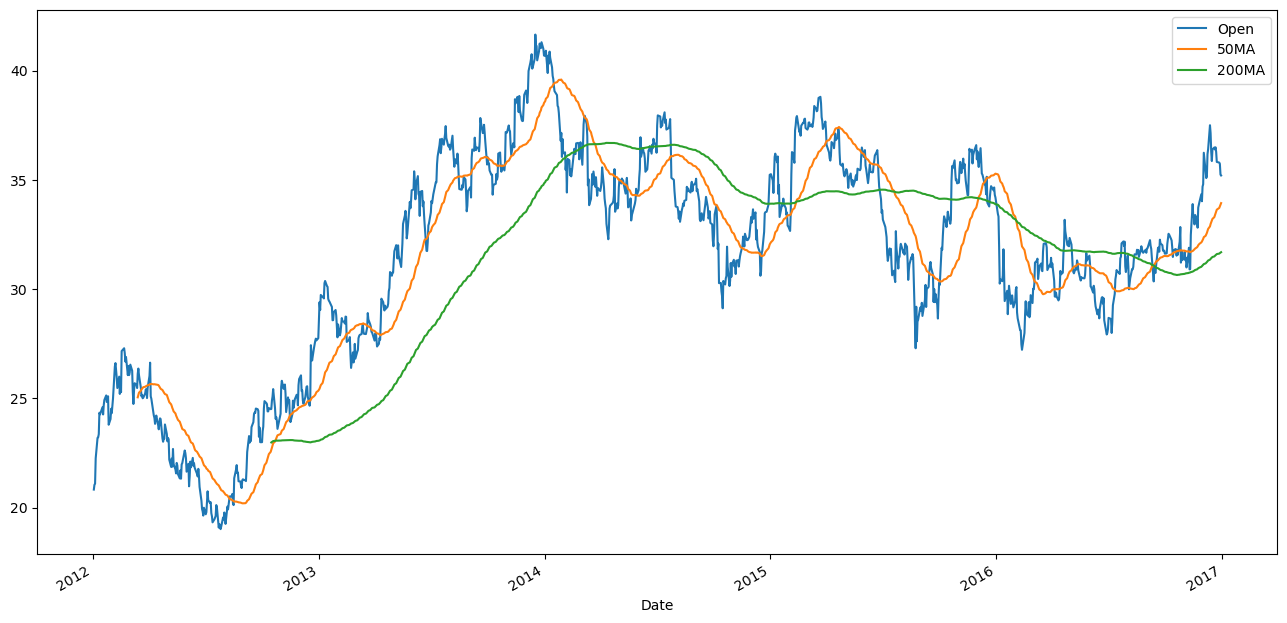

In [12]:
#plotting out MAs(moving averages)
Gmt['50MA']=Gmt['Open'].rolling(50).mean()
Gmt['200MA']=Gmt['Open'].rolling(200).mean()
Gmt[['Open','50MA','200MA']].plot(label='GM',figsize=(16,8))
Gmt[['Open','50MA','200MA']].head()

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='GM Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='GM Open'>,
        <Axes: xlabel='GM Open', ylabel='GM Open'>,
        <Axes: xlabel='Ford Open', ylabel='GM Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Ford Open'>,
        <Axes: xlabel='GM Open', ylabel='Ford Open'>,
        <Axes: xlabel='Ford Open', ylabel='Ford Open'>]], dtype=object)

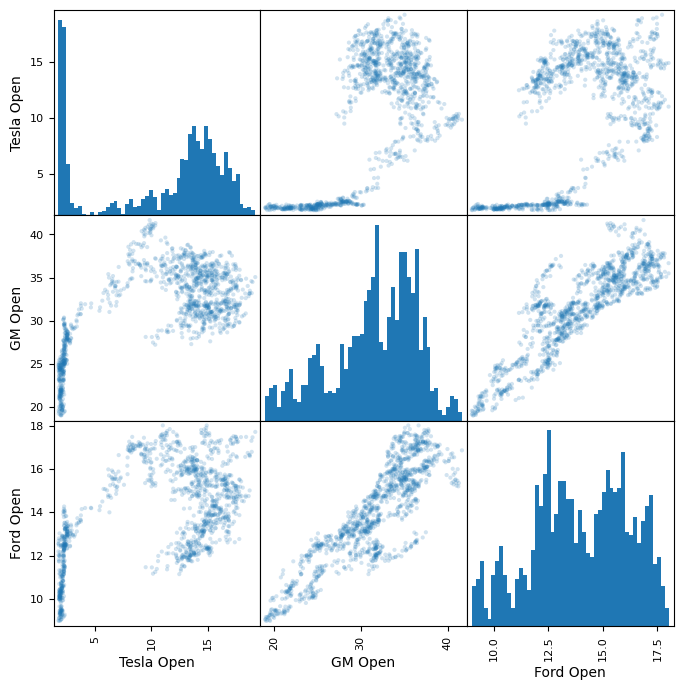

In [13]:
from pandas.plotting import scatter_matrix
car_comp = pd.concat([Tesla['Open'],Gmt['Open'],Ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
car_comp
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})













In [14]:
#daily percentage change
Tesla['Returns']=(Tesla['Close']/Tesla['Close'].shift(1))-1
Tesla.head()
Ford['Returns']=(Ford['Close']/Ford['Close'].shift(1))-1
Ford.head()
Gmt['Returns']=(Gmt['Close']/Gmt['Close'].shift(1))-1
Gmt.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,50MA,200MA,Returns
Date,,,,,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,15.935246,9321300,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.049999,21.370001,20.750000,21.150000,16.010950,7856700,1.653835e+08,NaN,NaN,0.004751
2012-01-05,21.100000,22.290001,20.959999,22.170000,16.783110,17880600,3.772807e+08,NaN,NaN,0.048227
2012-01-06,22.260000,23.030001,22.240000,22.920000,17.350870,18234500,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.200001,23.430000,22.700001,22.840000,17.290312,12084500,2.803604e+08,NaN,NaN,-0.003490


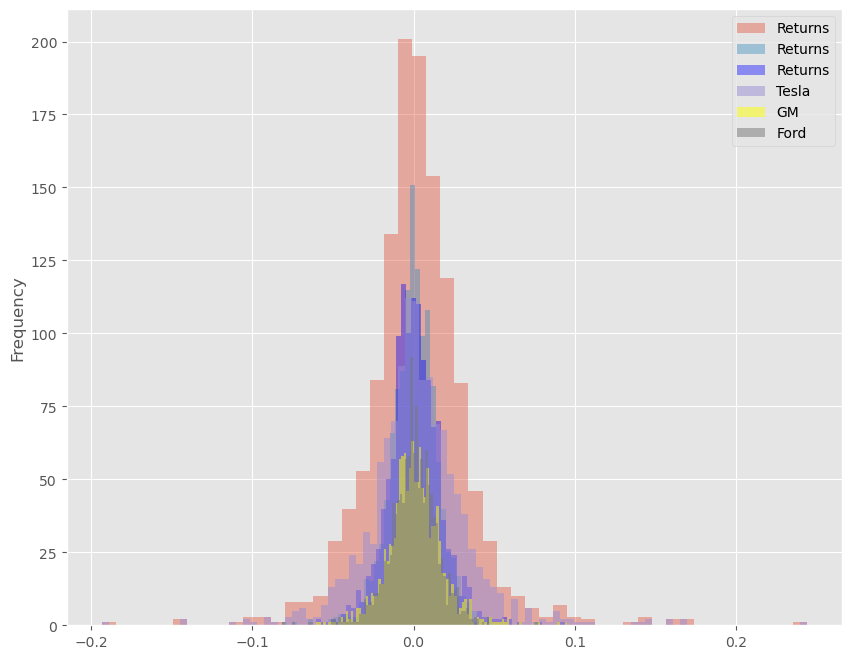

In [15]:
#plot a histogram of each companies returns
plt.style.use('ggplot')
Tesla['Returns'].plot.hist(bins=50,alpha=0.4)
Ford['Returns'].plot.hist(bins=50,alpha=0.4)
Gmt['Returns'].plot.hist(bins=50,alpha=0.4,color='blue')
Tesla['Returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
Gmt['Returns'].hist(bins=100,label='GM',alpha=0.5,color='yellow')
Ford['Returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()


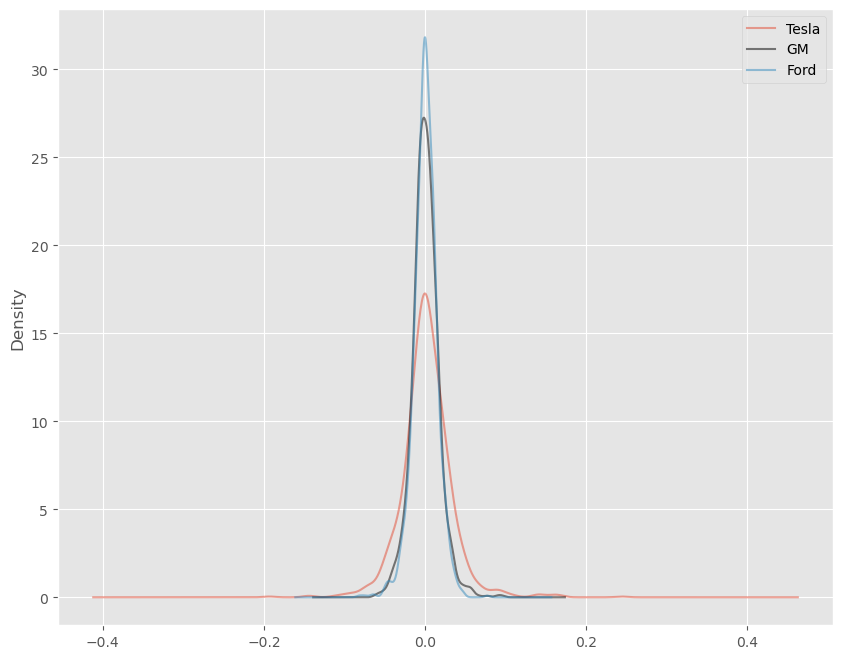

In [16]:
#plotting a KDE instead of histograms for another view point.
Tesla['Returns'].plot.density(label='Tesla',figsize=(10,8),alpha=0.5)
Gmt['Returns'].plot.density(label='GM',alpha=0.5,color='black')
Ford['Returns'].plot.density(label='Ford',alpha=0.5)
plt.legend()

<Axes: >

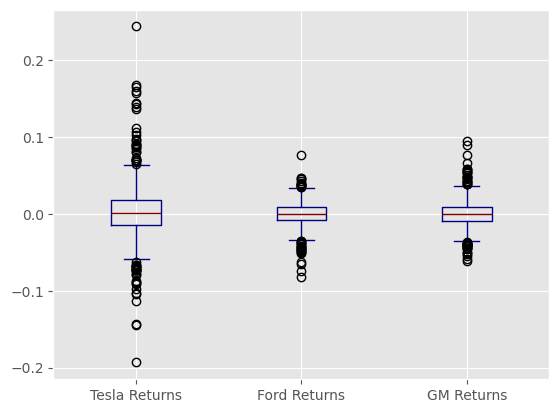

In [17]:
# creating some box plots comparing the returns.
boxed=pd.concat([Tesla['Returns'],Ford['Returns'],Gmt['Returns']],axis=1)
boxed.columns=['Tesla Returns','Ford Returns','GM Returns']
boxed.plot.box(colormap='jet')

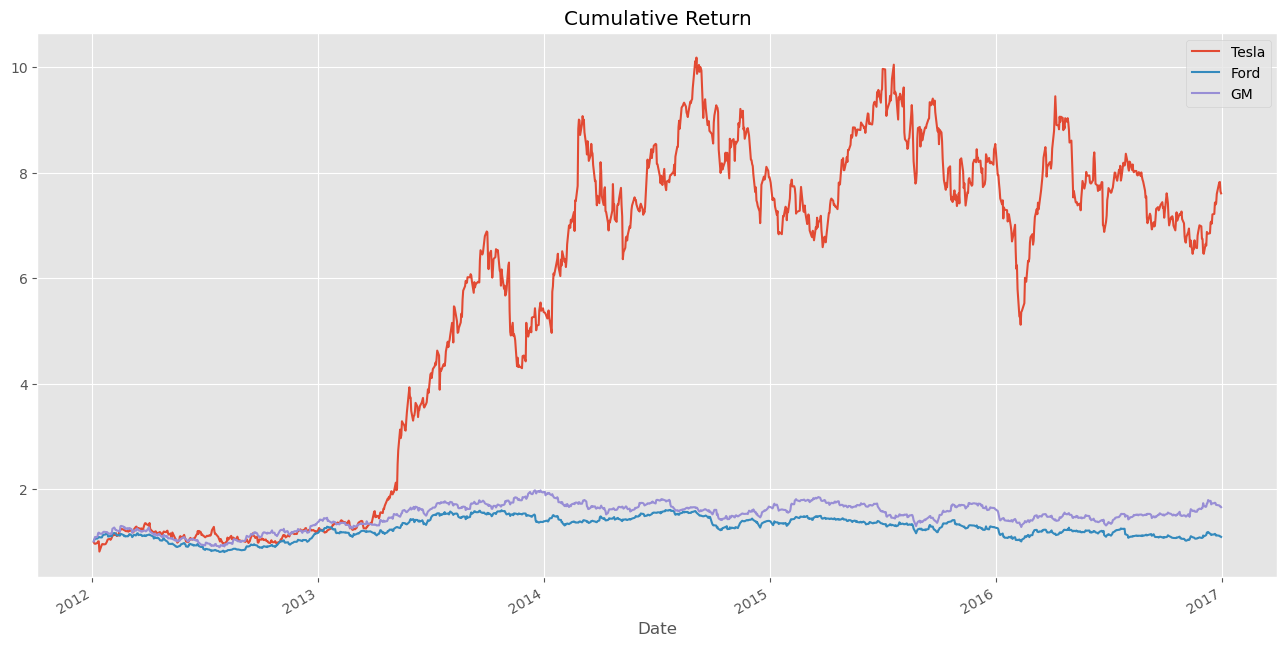

In [19]:
#Comparing Daily Returns between Stocks
Tesla['Cumulative Return'] = (1 + Tesla['Returns']).cumprod()
Tesla.head()
Ford['Cumulative Return'] = (1 + Ford['Returns']).cumprod()
Gmt['Cumulative Return'] = (1 + Gmt['Returns']).cumprod()
Tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
Ford['Cumulative Return'].plot(label='Ford')
Gmt['Cumulative Return'].plot(label='GM')
plt.legend()